In [ ]:
# import libraries
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# loading data
posts_df = pd.read_csv("15k_posts.csv")
comments_df = pd.read_csv("40k_comments.csv")

# initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# custom stopwords
# extra_stopwords = set([
#     'game', 'highlight', 'win', 'season', 'play', 'nba', 'year', 'point',
#     'defeat', 'player', 'thread', 'post', 'team', 'th', 'im'
# ])

# function to clean and pre-process text
def clean_text(text):

    if not isinstance(text, str):  # skip NaN
        return ''
    
    # remove URLs
    text = re.sub(r'http\S+', '', text)
    # remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # convert to lowercase
    text = text.lower()
    # tokenize
    tokens = word_tokenize(text)
    # remove stopwords
    stop_words = set(stopwords.words('english')) # | extra_stopwords
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    # lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# clean data
posts_df['cleaned_title'] = posts_df['title'].apply(clean_text)
comments_df['cleaned_body'] = comments_df['body'].apply(clean_text)

# print examples
print("Pre-cleaned Post Titles:")
print(posts_df['title'].head())
print("Pre-cleaned Comments:")
print(comments_df['body'].head())
print("Cleaned Post Titles:")
print(posts_df['cleaned_title'].head())
print("Cleaned Comments:")
print(comments_df['cleaned_body'].head())

# diversity check
def extract_words(text):
    return re.findall(r'\w+', text.lower())

post_titles = posts_df['cleaned_title'].apply(extract_words).sum()
comment_bodies = comments_df['cleaned_body'].apply(extract_words).sum()

unique_post_words = set(post_titles)
unique_comment_words = set(comment_bodies)

print("\nunique words in post titles:", len(unique_post_words))
print("unique words in comments:", len(unique_comment_words))

if len(unique_post_words) > 300 and len(unique_comment_words) > 1000:
    print("Data is adequate")
else:
    print("Data might be insufficient")

# save cleaned data
posts_df.to_csv("clean_15k_posts.csv", index=False)
comments_df.to_csv("clean_40k_comments.csv", index=False)
print("cleaned data saved")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\regor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\regor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\regor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Pre-cleaned Post Titles:
0                              One Piece: Chapter 1149
1                              One Piece: Episode 1130
2                           Female Character Redesigns
3                 Strawhats representing their culture
4    Maid Lilith from the new Color spread! (Art by...
Name: title, dtype: object
Pre-cleaned Comments:
0    TCB's translation is a bit off for Imu's dialo...
1    It would be classic Oda to finally cut back to...
2    https://preview.redd.it/o0s6ww1zig2f1.jpeg?wid...
3    Everyone: Elbaf is gonna be Usopp’s arc\n\nOda...
4         what \n\n\nWHAT\n\n\nASSUMING DIRECT CONTROL
Name: body, dtype: object
Cleaned Post Titles:
0                                one piece chapter
1                                one piece episode
2                       female character redesigns
3                   strawhats representing culture
4    maid lilith new color spread art mielthemouse
Name: cleaned_title, dtype: object
Cleaned Comments:
0    tcbs translation


Straw Hat Pirate mentions in post titles
luffy: 462
nami: 238
zoro: 231
robin: 208
sanji: 154
chopper: 62
usopp: 56
brook: 45
franky: 36
jinbe: 8

Straw Hat Pirate mentions in comments
luffy: 4342
robin: 1289
zoro: 1183
sanji: 896
nami: 696
brook: 692
chopper: 549
usopp: 540
franky: 449
jinbe: 82


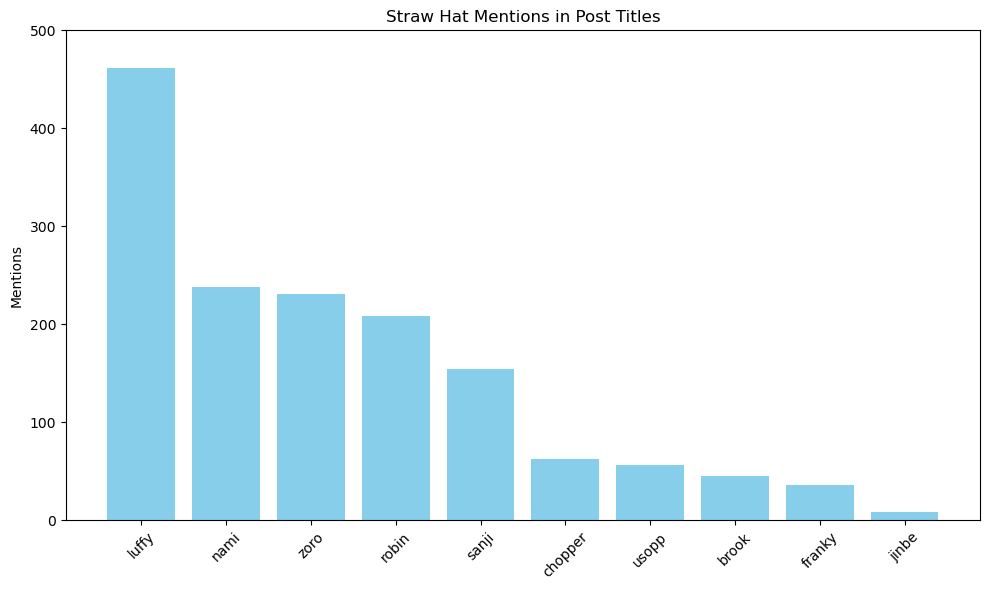

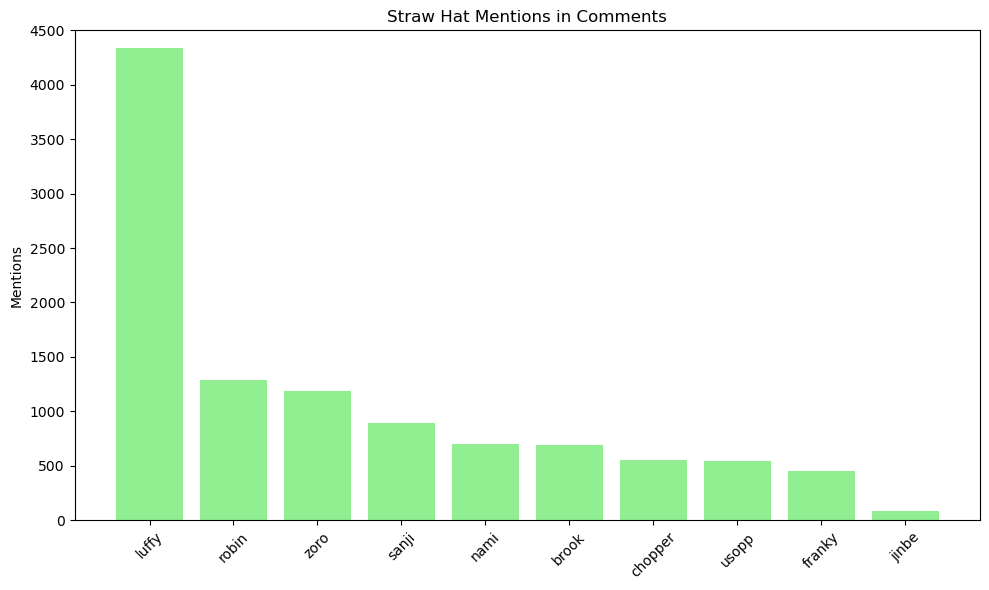

In [21]:
from collections import Counter

# official Straw Hat Pirate crew member names
straw_hat_names = [
    "luffy", "zoro", "nami", "usopp", "sanji",
    "chopper", "robin", "franky", "brook", "jinbe"
]

# extract and count words
post_titles = posts_df['cleaned_title'].fillna('').apply(extract_words).sum()
comment_bodies = comments_df['cleaned_body'].fillna('').apply(extract_words).sum()

word_counts_posts = Counter(post_titles)
word_counts_comments = Counter(comment_bodies)

# filter and sort by each member
straw_hat_post_counts = {name: word_counts_posts[name] for name in straw_hat_names}
straw_hat_comment_counts = {name: word_counts_comments[name] for name in straw_hat_names}

# sort by frequency
sorted_post_counts = sorted(straw_hat_post_counts.items(), key=lambda x: x[1], reverse=True)
sorted_comment_counts = sorted(straw_hat_comment_counts.items(), key=lambda x: x[1], reverse=True)

print("\nStraw Hat Pirate mentions in post titles")
for name, count in sorted_post_counts:
    print(f"{name}: {count}")

print("\nStraw Hat Pirate mentions in comments")
for name, count in sorted_comment_counts:
    print(f"{name}: {count}")

import matplotlib.pyplot as plt

# split sorted data into names and counts
post_names, post_counts = zip(*sorted_post_counts)
comment_names, comment_counts = zip(*sorted_comment_counts)

import matplotlib.pyplot as plt

# plot for post titles
plt.figure(figsize=(10, 6))
plt.bar(post_names, post_counts, color='skyblue')
plt.title("Straw Hat Mentions in Post Titles")
plt.ylabel("Mentions")
plt.ylim(0, 500)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# plot for comments
plt.figure(figsize=(10, 6))
plt.bar(comment_names, comment_counts, color='lightgreen')
plt.title("Straw Hat Mentions in Comments")
plt.ylabel("Mentions")
plt.ylim(0, 4500)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

comments_df = pd.read_csv("clean_40k_comments.csv")
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_label(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

comments_df['sentiment_score'] = comments_df['cleaned_body'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])
comments_df['sentiment_label'] = comments_df['sentiment_score'].apply(get_sentiment_label)

comments_df.to_csv("comment_sentiment.csv", index=False)
print("saved data")
print(comments_df['sentiment_label'].value_counts())

# official Straw Hat Pirate crew member names
straw_hat_names = [
    "luffy", "zoro", "nami", "usopp", "sanji",
    "chopper", "robin", "franky", "brook", "jinbe"
]

# create a dictionary to hold sentiment counts for each Straw Hat
pirate_sentiment_counts = {}

for name in straw_hat_names:
    # filter rows where the pirate's name is mentioned
    relevant_comments = comments_df[comments_df['cleaned_body'].str.contains(fr'\b{name}\b', na=False)]
    
    # count sentiment labels
    sentiment_distribution = relevant_comments['sentiment_label'].value_counts().to_dict()
    
    # store in the dictionary
    pirate_sentiment_counts[name] = sentiment_distribution

# print results sorted by total mentions per pirate
print("\nSentiment distribution per Straw Hat Pirate:")
for name, sentiments in sorted(pirate_sentiment_counts.items(), key=lambda x: sum(x[1].values()), reverse=True):
    print(f"\n{name.capitalize()}:")
    for sentiment, count in sentiments.items():
        print(f"  {sentiment}: {count}")


saved data
sentiment_label
positive    16373
neutral     14788
negative     8839
Name: count, dtype: int64

Sentiment distribution per Straw Hat Pirate:

Brook:
  positive: 232
  negative: 167
  neutral: 158

Chopper:
  positive: 254
  neutral: 148
  negative: 106

Franky:
  positive: 200
  neutral: 99
  negative: 98

Jinbe:
  positive: 38
  neutral: 23
  negative: 19

Luffy:
  positive: 1609
  negative: 1069
  neutral: 544

Nami:
  positive: 343
  neutral: 154
  negative: 140

Robin:
  positive: 590
  neutral: 303
  negative: 245

Sanji:
  positive: 377
  negative: 195
  neutral: 192

Usopp:
  positive: 246
  negative: 137
  neutral: 105

Zoro:
  positive: 485
  negative: 307
  neutral: 221


In [23]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

# load cleaned comments
comments_df = pd.read_csv("clean_40k_comments.csv")
stop_words = stopwords.words('english')

# official Straw Hat Pirate crew member names
straw_hat_names = [
    "luffy", "zoro", "nami", "usopp", "sanji",
    "chopper", "robin", "franky", "brook", "jinbe"
]

# function to display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic {topic_idx + 1}:")
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        print(", ".join(top_words))

# run topic modeling per pirate
for pirate in straw_hat_names:
    pirate_comments = comments_df[comments_df['cleaned_body'].str.contains(fr'\b{pirate}\b', na=False)]
    texts = pirate_comments['cleaned_body'].dropna().tolist()

    if len(texts) < 10:
        print(f"\n{pirate.capitalize()} - not enough comments for topic modeling.")
        continue

    print(f"\nTopics for {pirate.capitalize()}")

    vectorizer = CountVectorizer(
        tokenizer=word_tokenize,
        stop_words=stop_words
    )
    dtm = vectorizer.fit_transform(texts)

    lda_model = LatentDirichletAllocation(n_components=3, random_state=42)
    lda_model.fit(dtm)

    feature_names = vectorizer.get_feature_names_out()
    display_topics(lda_model, feature_names, no_top_words=5)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\regor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\regor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Topics for Luffy


c:\Users\regor\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\regor\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'m", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(



Topic 1:
luffy, like, one, fight, kaido

Topic 2:
luffy, fruit, would, one, pirate

Topic 3:
luffy, like, one, think, imu

Topics for Zoro

Topic 1:
zoro, luffy, haki, like, sanji

Topic 2:
zoro, like, luffy, would, fight

Topic 3:
zoro, luffy, one, sanji, like

Topics for Nami

Topic 1:
nami, luffy, robin, sanji, zoro

Topic 2:
nami, like, one, look, character

Topic 3:
nami, like, luffy, one, robin

Topics for Usopp

Topic 1:
usopp, luffy, sanji, robin, zoro

Topic 2:
usopp, observation, haki, armament, could

Topic 3:
usopp, like, one, luffy, would

Topics for Sanji

Topic 1:
sanji, like, one, luffy, anime

Topic 2:
sanji, luffy, zoro, like, robin

Topic 3:
sanji, like, zoro, haki, luffy

Topics for Chopper

Topic 1:
chopper, luffy, robin, nami, sanji

Topic 2:
chopper, like, one, luffy, time

Topic 3:
chopper, luffy, like, brook, robin

Topics for Robin

Topic 1:
robin, haki, sanji, like, think

Topic 2:
robin, like, one, luffy, nami

Topic 3:
robin, fruit, luffy, would, crocodile

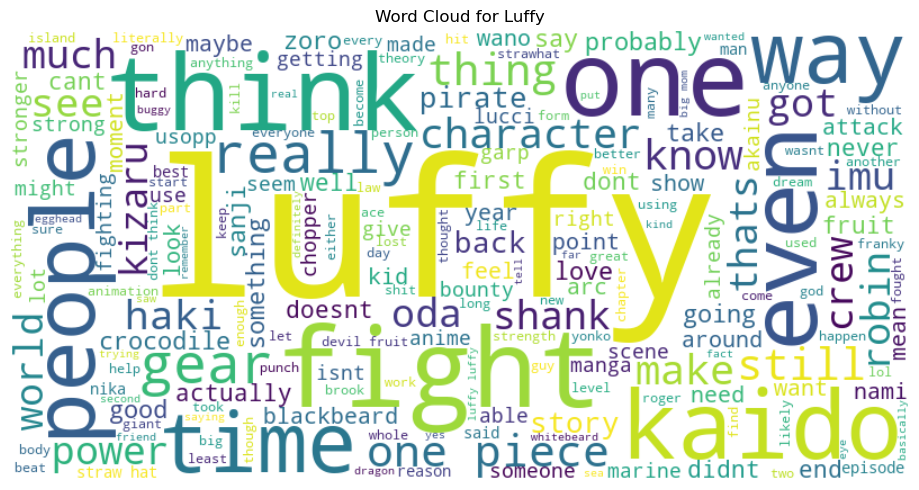

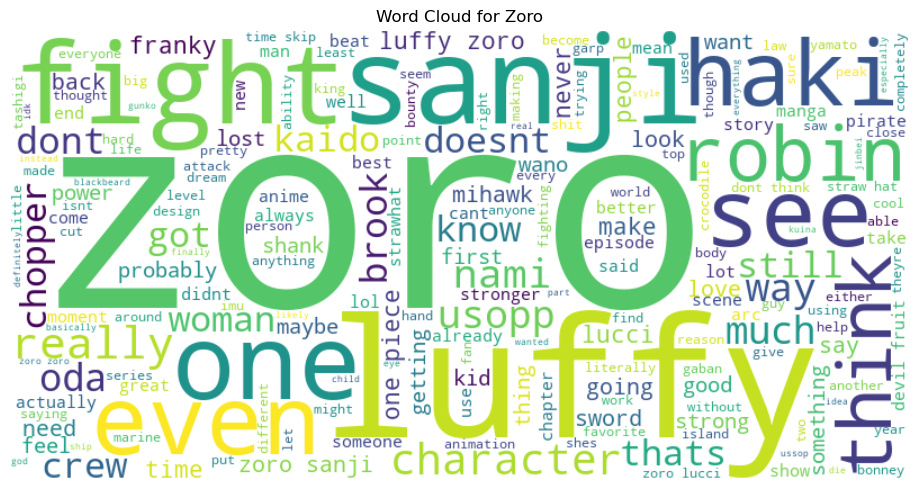

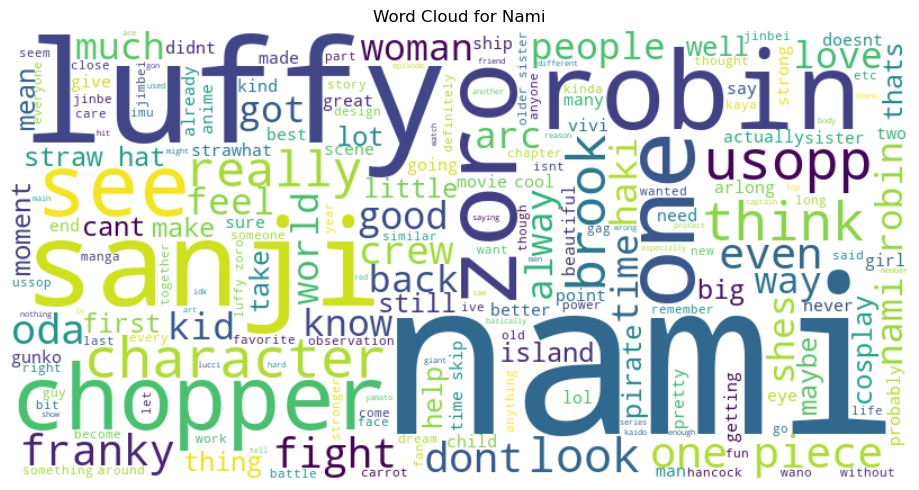

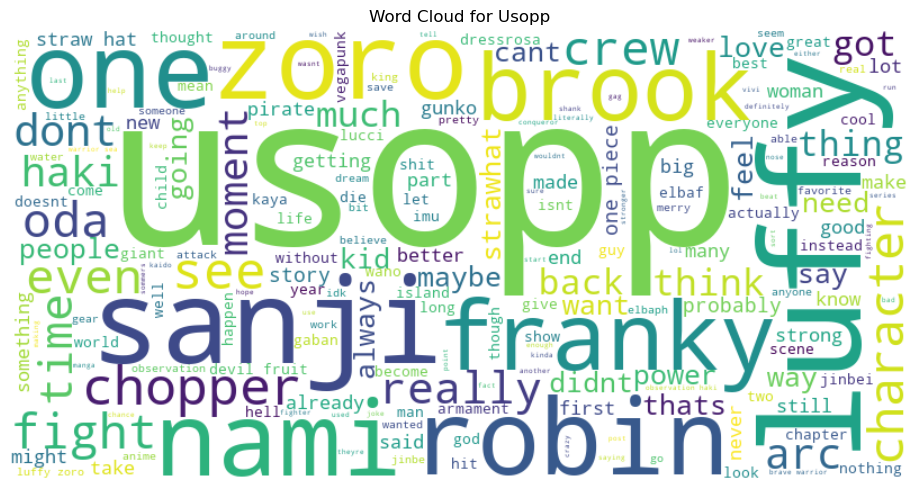

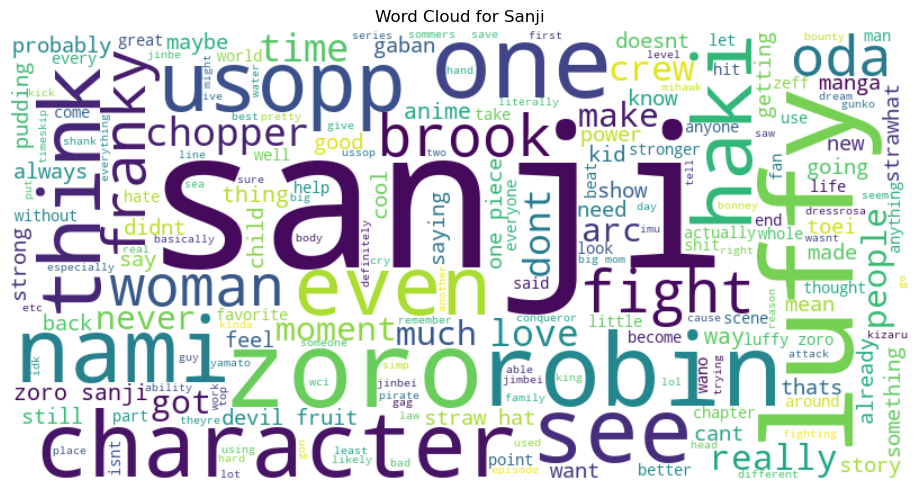

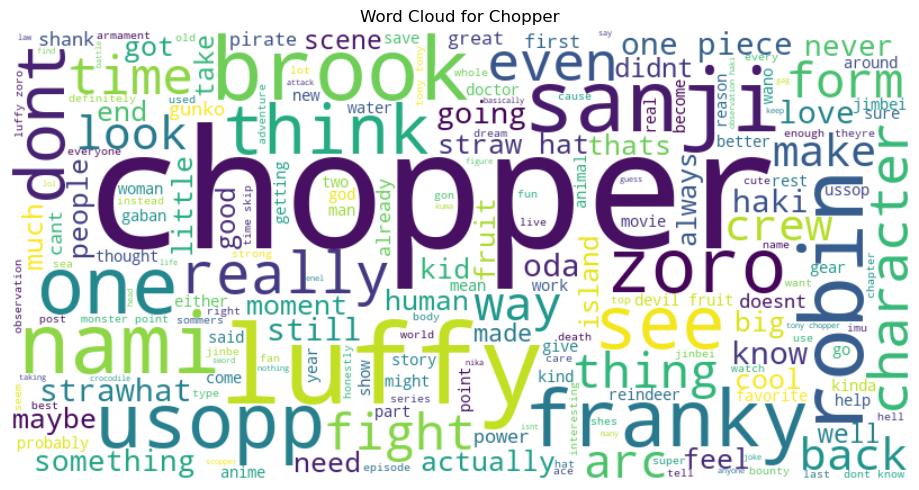

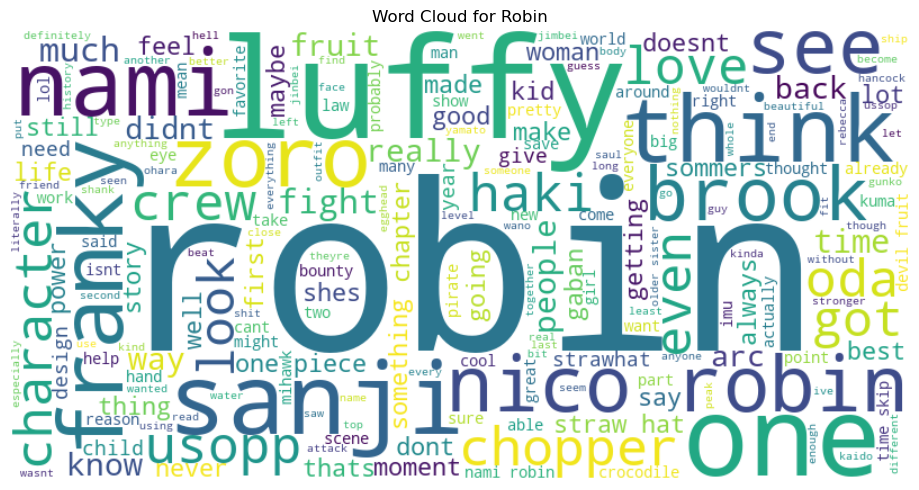

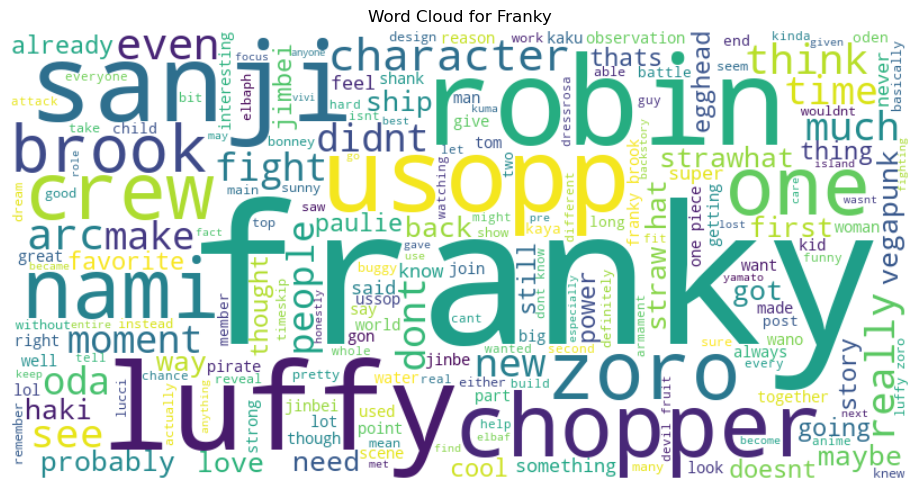

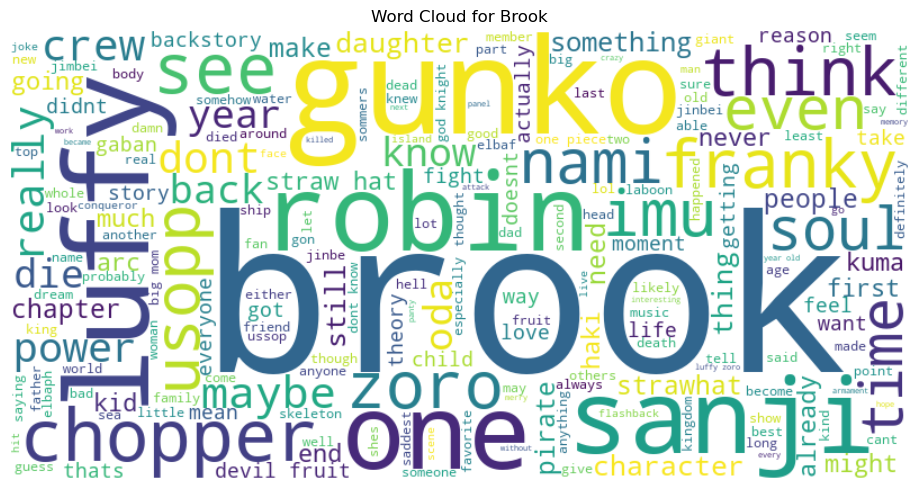

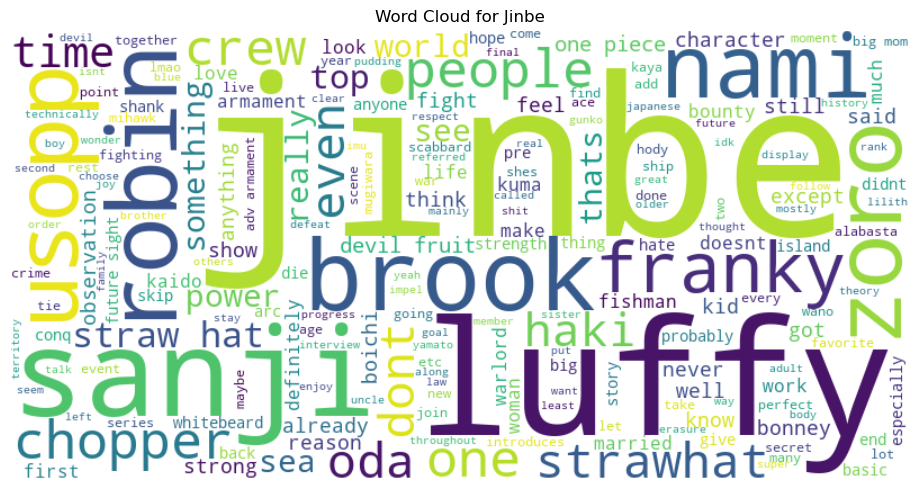

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load cleaned comments
comments_df = pd.read_csv("clean_40k_comments.csv")

# official Straw Hat Pirate crew member names
straw_hat_names = [
    "luffy", "zoro", "nami", "usopp", "sanji",
    "chopper", "robin", "franky", "brook", "jinbe"
]

# Generate word cloud for each Straw Hat
for pirate in straw_hat_names:
    # Filter comments that mention the pirate
    pirate_comments = comments_df[comments_df['cleaned_body'].str.contains(fr'\b{pirate}\b', na=False)]
    text = ' '.join(pirate_comments['cleaned_body'].dropna().tolist())

    if len(text) < 50:
        print(f"\n{pirate.capitalize()} - not enough data for word cloud.")
        continue

    # Generate and show word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {pirate.capitalize()}")
    plt.axis("off")
    plt.tight_layout()
    plt.show()
